# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

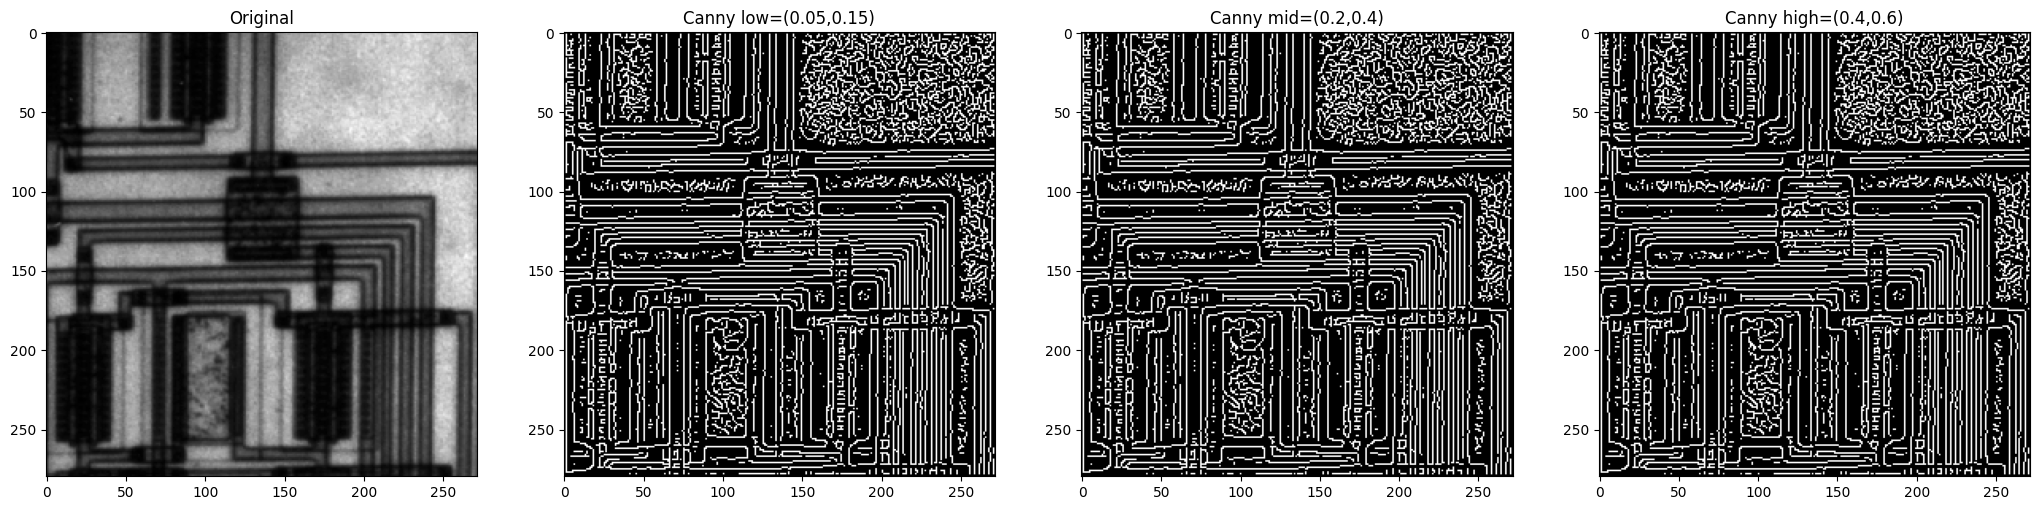

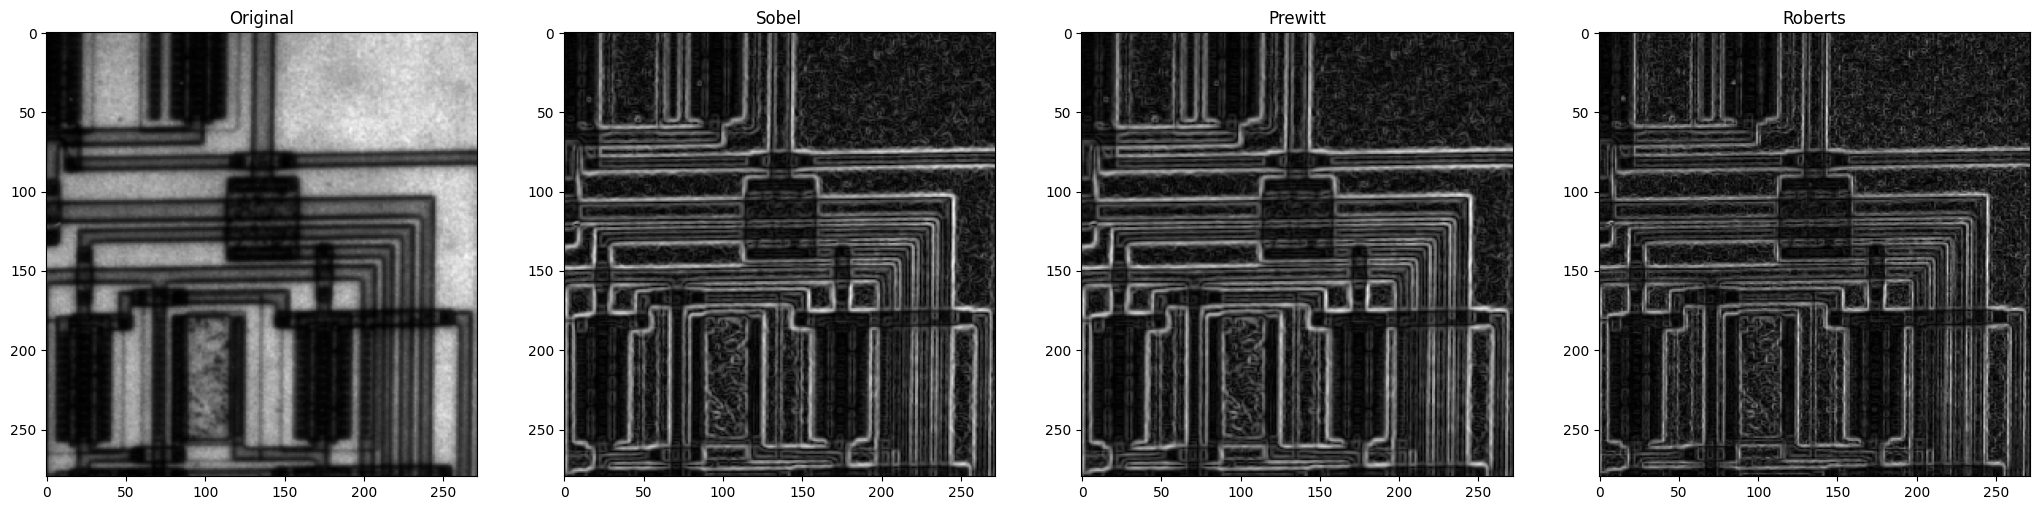

In [4]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

## this one does not work ##
# img = rgb2gray(io.imread('circuit.tif'))
## So I read this ##
img = io.imread('circuit.tif')

sobel_img = sobel(img)
sobel_img_h = sobel_h(img)
sobel_img_v = sobel_v(img)
prewitt_img = prewitt(img)
roberts_img = roberts(img)

canny_low = canny(img, sigma=1.0, low_threshold=0.05, high_threshold=0.15)
canny_mid = canny(img, sigma=1.0, low_threshold=0.2, high_threshold=0.4)
canny_high = canny(img, sigma=1.0, low_threshold=0.4, high_threshold=0.6)
canny_very_high = canny(img, sigma=1.0, low_threshold=0.6, high_threshold=0.8)

# Display results
show_images(
    [img, canny_low, canny_mid, canny_high],
    ['Original', 'Canny low=(0.05,0.15)', 'Canny mid=(0.2,0.4)',
     'Canny high=(0.4,0.6)']
)

show_images([img, sobel_img, prewitt_img, roberts_img],
            ['Original', 'Sobel', 'Prewitt', 'Roberts'])
# canny with different parameters


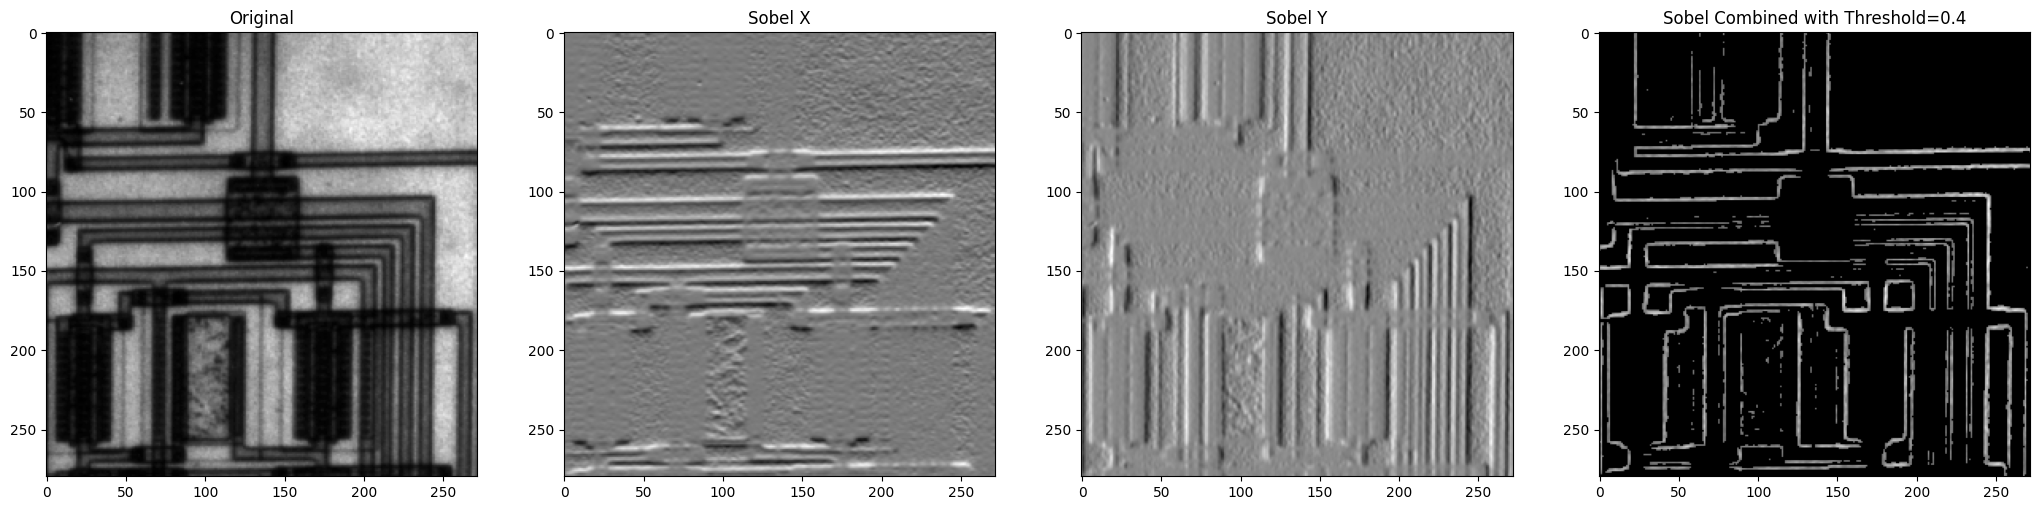

In [22]:
# 2. Custom Sobel (V-H-Both)
from scipy.ndimage import convolve

def sobel_edge_detection_gray(img, threshold=0.4):
    img = img.copy().astype(float)

    hx = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=float)

    hy = np.array([[-1,  0,  1],
                   [-2,  0,  2],
                   [-1,  0,  1]], dtype=float)

    Gx = convolve(img, hx)
    Gy = convolve(img, hy)

    G = np.sqrt(Gx**2 + Gy**2)

    G = G / G.max()

    G_thresh = np.where(G > threshold, G, 0.0)

    return Gx, Gy, G_thresh

Gx, Gy, G_thresh = sobel_edge_detection_gray(img, threshold=0.4)
show_images([img, Gx, Gy, G_thresh],
            ['Original', 'Sobel X', 'Sobel Y', f'Sobel Combined with Threshold={0.4}'])

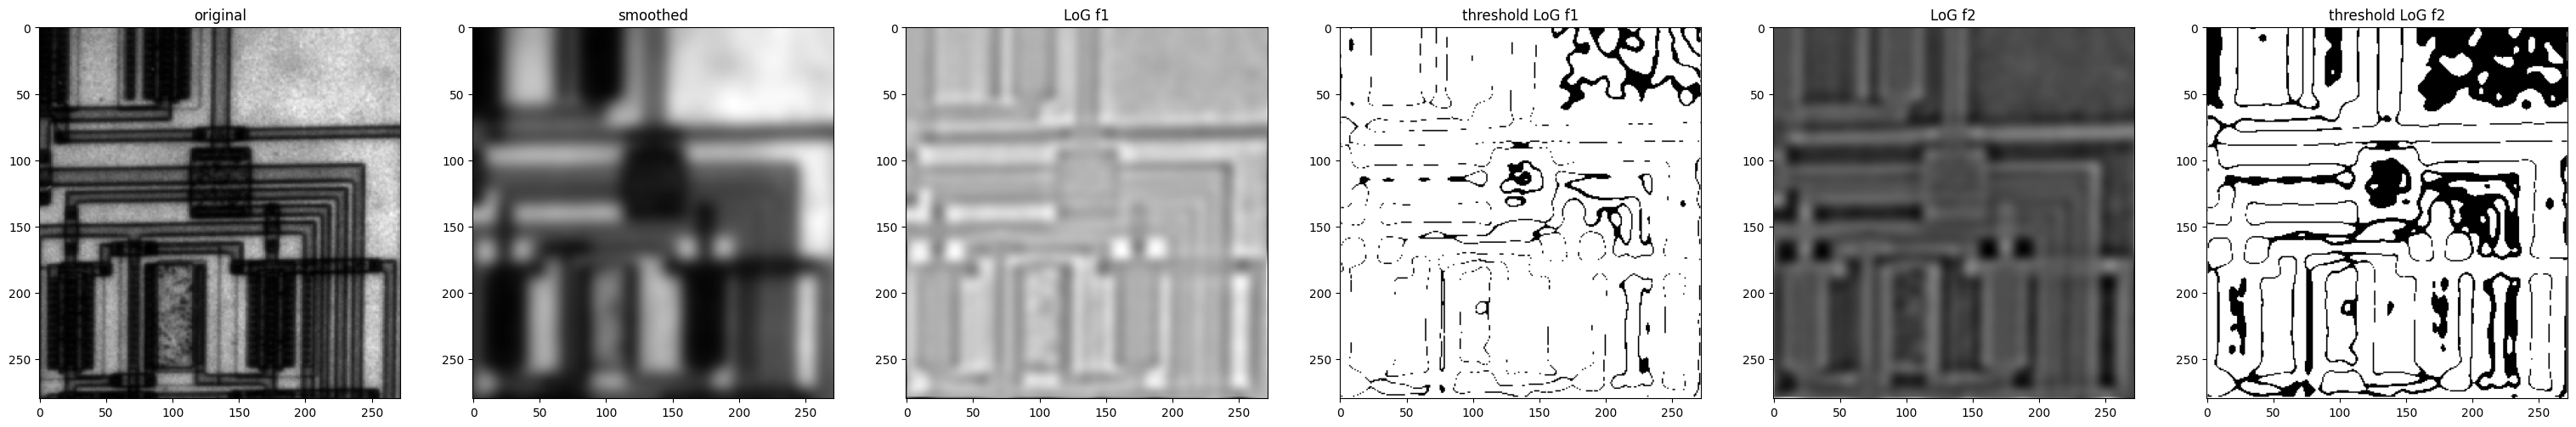

In [39]:
# 3. Custom LoG

from skimage.filters import gaussian

def LoG(img: np.ndarray, sigma: float, threshold: float):
    img_copy = img.copy().astype(float)
    
    img_smoothed = gaussian(img_copy, sigma=sigma)

    f1 = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=float)

    f2 = np.array([[ 0,  1,  0],
                   [ 1, -4,  1],
                   [ 0,  1,  0]], dtype=float)

    img_f1 = convolve(img_smoothed, f1, mode='reflect')
    img_f2 = convolve(img_smoothed, f2, mode='reflect')

    img_f1_thresh = np.where(np.abs(img_f1) > threshold, 1.0, 0.0)
    img_f2_thresh = np.where(np.abs(img_f2) > threshold, 1.0, 0.0)

    show_images([img, img_smoothed, img_f1, img_f1_thresh, img_f2, img_f2_thresh],
                ['original', 'smoothed', 'LoG f1', 'threshold LoG f1', 'LoG f2', 'threshold LoG f2'])

    return img_f1_thresh, img_f2_thresh

thres= 0.13

circuit_img = io.imread('circuit.tif', as_gray=True)

log_img_f1, log_img_f2 = LoG(circuit_img, sigma=5, threshold=thres)


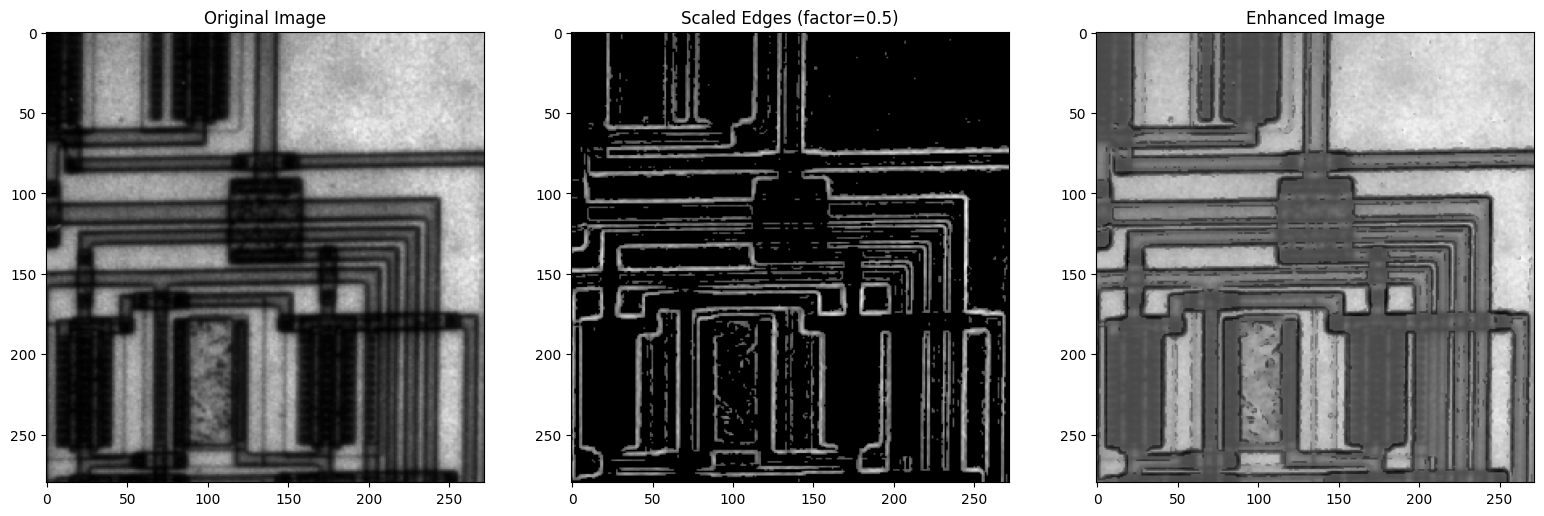

In [41]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

threshold = 0.3
factor = 0.5

_, _, G_thresh = sobel_edge_detection_gray(img, threshold=threshold)

scaled_edges = G_thresh * factor

enhanced = img.astype(float) - scaled_edges * 255 

show_images([img, scaled_edges, enhanced],
            ['Original Image', f'Scaled Edges (factor={factor})', 'Enhanced Image'])